In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from itertools import cycle

In [2]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/hizanidis_params.pkl" "../../data/hizanidis_params.pkl"

hizanidis_params.pkl
      128867 100%  122.90MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 1148 bytes  received 845 bytes  3986.00 bytes/sec
total size is 128867  speedup is 64.66


In [3]:
with open("../../data/hizanidis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera,max_phase
0,1.053,0.656,-7235.701131,0.064566,25132.741229
1,2.835,0.431,-6117.816505,0.081715,25132.741229
2,0.770,0.513,-8698.908403,0.063440,25132.741229
3,1.053,0.349,-6771.758313,0.087028,25132.741229
4,1.013,0.082,-8811.385144,0.064524,25132.741229


In [4]:
c = params.pivot_table(values="chimera", index="beta", columns="alpha")

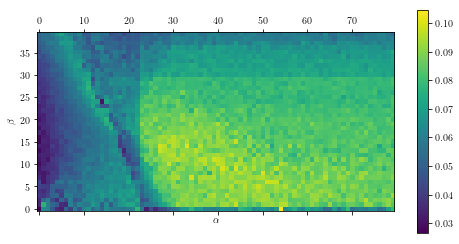

In [5]:
plt.matshow(c.values[:, :], origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

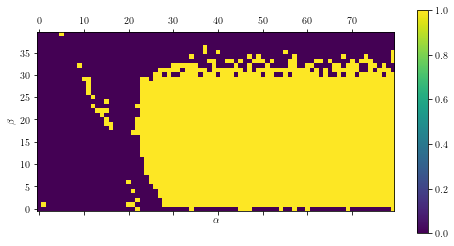

In [6]:
plt.matshow(np.heaviside(c.values - 1/14, 0), origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

In [7]:
p = params.pivot_table(values="max_phase", index="beta", columns="alpha")

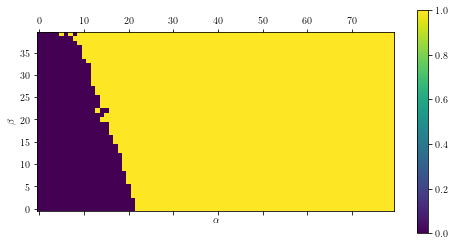

In [8]:
plt.matshow(np.heaviside(p.values[:, :] - 2*np.pi, 0), origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

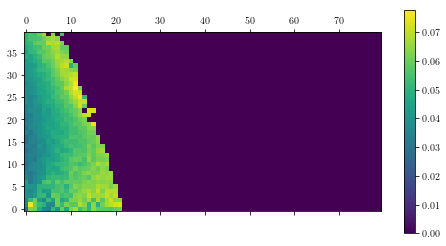

In [9]:
v = c.values.copy()
v[p.values >= 2*np.pi] = 0
plt.matshow(v, origin="lower")
plt.colorbar()

In [4]:
good = params[params["max_phase"] <= 2*np.pi]